##### Departamento de Física - Faculdade de Ciências e Tecnologia da Universidade de Coimbra #####
# Sistemas Dinâmicos e Complexos - Trabalho 2 #
### Rafael Isaque Santos - 2012144694 - Licenciatura em Física ###

Neste trabalho utilizo o Python 3.4.3, fazendo uso do Jupyter 4.0.6 para a apresentação, e das seguintes bibliotecas do Python:
+ **NumPy 1.10.4** - Pacote de cálculo númerico
+ **Matplotlib 1.5.1** - Pacote gráfico
+ **SciPy 0.17.0** - Pacote científico

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import argrelmax

Definindo "%matplotlib <parâmetro>" designo o método de exibição de imagens do matplotlib no Notebook.
Recomendo para a visualização dos resultados:
+ __notebook__ - gera um objecto interactivo em *javascript*, manipulável no browser.
+ __inline__ - gera uma imagem abaixo da célula 

In [2]:
%matplotlib inline

Em primeiro lugar, define-se uma função (do Python) para as equações de Lorenz:

$\frac{dx}{dt} = \sigma (y-x)$

$\frac{dy}{dt} = x(\rho -z)-y$

$\frac{dz}{dt}=xy-\beta z$

Em que $\sigma = 10$, $\rho =28 $ e $\beta=\frac{8}{3}$

In [3]:
def lorenz(x, y, z, sigma=10, rho=28, beta=8/3):
    x_dot = sigma * (y - x)
    y_dot = rho * x - y - x * z
    z_dot = x * y - beta * z
    return x_dot, y_dot, z_dot

Escolhe-se um número total de iterações numéricas **"stepCnt"**  e um intervalo de tempo entre cada iteração **"dt"** , que dá ao sistema uma precisão a utilizar.

O intervalo de tempo total em análise no sistema é dado por **stepCnt** * **dt**.

Os valores foram escolhidos de forma a obter uma representação nítida dos comportamentos a observar nas ilustrações gráficas abaixo, já que com valores inferiores se verificou difícil de fazer uma análise apropriada.

In [4]:
dt = 0.0001
stepCnt = 1000000

Utiliza-se o módulo  _empty_  para gerar um novo array (vazio, já que está por preencher e dessa forma é computacionalmente menos exigente) para cada iteração da Integração a obter: 

In [5]:
xs = np.empty((stepCnt + 1,))
ys = np.empty((stepCnt + 1,))
zs = np.empty((stepCnt + 1,))
t = np.empty((stepCnt + 1,))

Definem-se as condições iniciais para a integração:

$(x(0), y(0), z(0)) = (0, 1, 0)$ :

In [6]:
xs[0], ys[0], zs[0] = (0., 1., 0.)

Pretende-se integrar em função do tempo as equações de Lorenz, para saber como as trajectórias evoluem para um sistema longo.
Como Lorenz fez anteriormente, na sua experiência, o valor de $\rho = 28$ passa o valor da bifurcação de Hopf em que:

$\rho_{H} = \frac{\sigma (\sigma + \beta + 3)}{\sigma - \beta - 1} \approx 24.74$

Com este ciclo, integram-se as equações do sistema de Lorenz, aproveitando saber de antemão quais os valores de cada $ \frac{dx}{dt} , \frac{dy}{dt} e \frac{dz}{dt}, multiplicando iterativamente cada um desses valores relativamente à posição anterior pelo valor de precisão, já definido, **dt**.

In [7]:
for i in range(stepCnt):
    x_dot, y_dot, z_dot= lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)
    t[i] = i * dt
t[stepCnt] = stepCnt * dt  # como o ciclo termina em stepCnt e anteriormente foi gerado com dimensão stepCnt+1, é necessário preencher o seu último valor

A primeira solução, à esquerda, estando compreendida nos primeiros 25 segundos, permite-nos observar o comportamento inicial do sistema.
A segunda solução, à direita, com um intervalo mais extenso, dá a entender como o sistema evolui depois de estabilizar.

Pode-se aferir que o sistema estabiliza para uma oscilação irregular à medida que $t \rightarrow \infty$.
O movimento é aperíodico.

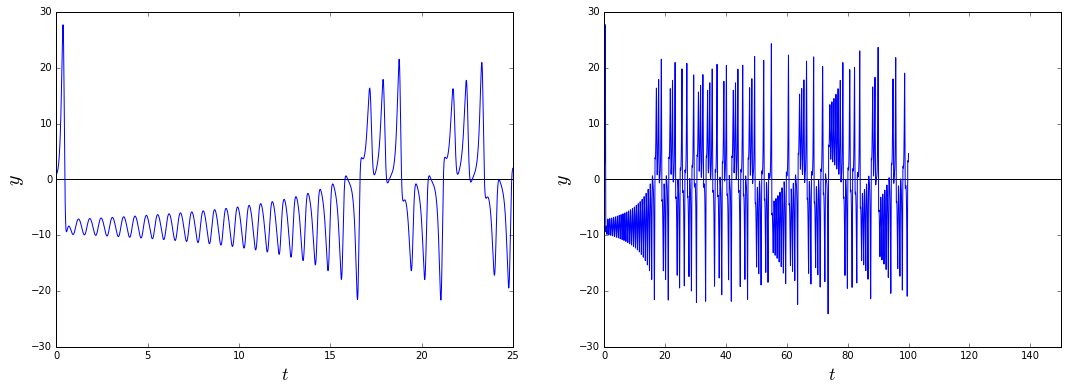

In [8]:
fig1 = plt.figure(figsize = (18,6))

ax1 = plt.subplot(121, xlim=(0,25))
ax1.set_xlabel('$t$', fontsize=18)
ax1.set_ylabel('$y$', fontsize=20) 
ax1.axhline(y = 0, color = 'k')
plt.plot(t, ys)

ax2 = plt.subplot(122, xlim=(0,150))
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$y$', fontsize=20) 
ax2.axhline(y = 0, color = 'k')
ax2.axhline(y=0, color='k')

plt.plot(t, ys)

A projecção do movimento no plano xz ($z(t)$ em função de $x(t)$) revela, como esperado, o padrão em forma de borboleta:

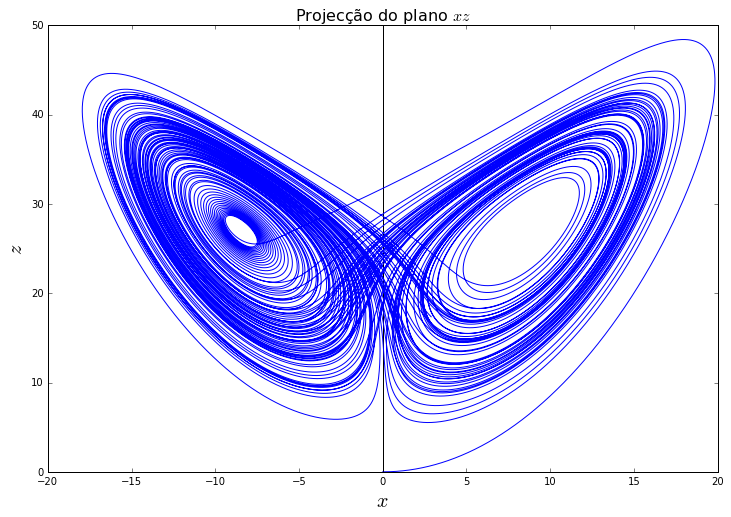

In [9]:
fig2 = plt.figure(figsize = (12, 8))
ax3 = fig2.add_subplot(1,1,1)
ax3.set_xlabel('$x$', fontsize=20)
ax3.set_ylabel('$z$', fontsize=20)
ax3.set_title('Projecção do plano $xz$', fontsize=16)
ax3.axvline(x = 0, color = 'k')

plt.plot(xs[:1000000], zs[:1000000])

Como o Jupyter permite gerar objectos interactivos, aproveito para gerar uma representação tridimensional do sistema:

<IPython.core.display.Javascript object>


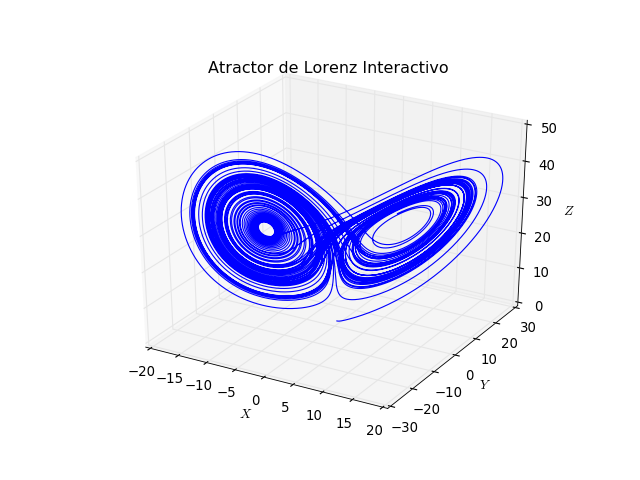

In [10]:
%matplotlib notebook
fig3d = plt.figure()
ax3d = fig3d.gca(projection='3d')
ax3d.plot(xs[:750000], ys[:750000], zs[:750000]) #intervalo limitado para a imagem não saturar
ax3d.set_xlabel('$X$')
ax3d.set_ylabel('$Y$')
ax3d.set_zlabel('$Z$')
ax3d.set_title('Atractor de Lorenz Interactivo')
plt.show()

In [11]:
%matplotlib inline

#### Mapa de Lorenz ####
Analisando a dinâmica do seu atractor estranho, _Lorenz_ verificou existir uma propriedade do sistema que permitia obter alguma ordem a partir do caos.

Essa propriedade diz que $z_{n}$, o n-ésimo máximo local de $z(t)$, permite saber $z_{n+1}$ o máximo local seguinte a $z_{n}$.

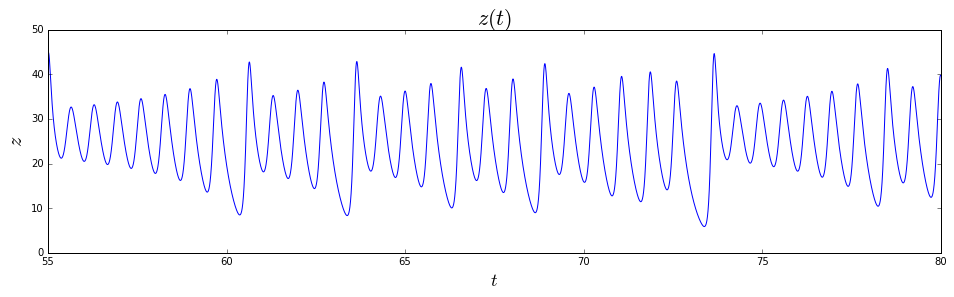

In [12]:
fig4 = plt.figure(figsize = (16,4))
ax4 = plt.subplot(111, xlim=(55,80)) #intervalo entre 55 e 80 segundos, escolhido arbitrariamente.
ax4.set_xlabel('$t$', fontsize=18)
ax4.set_ylabel('$z$', fontsize=20)
ax4.set_title('$z(t)$', fontsize=22)
ax4.axhline(y = 0, color = 'k')
plt.plot(t, zs)

Para se encontrar os máximos locais de $z(t)$ utiliza-se __argrelmax__ 

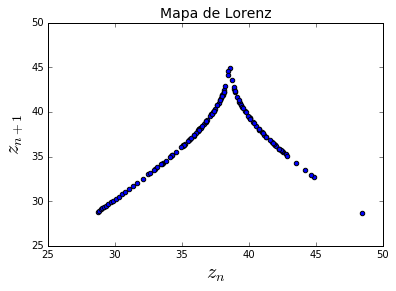

In [13]:
nmax = argrelmax(zs)[0]
plt.scatter(zs[nmax[:-1]], zs[nmax[1:]])
plt.title("Mapa de Lorenz", fontsize=14)
plt.xlabel('$z_{n}$', fontsize=20)
plt.ylabel('$z_{n+1}$', fontsize=20)
plt.show()

Para calcular a dimensão de correlação $d_{corr}$ do sistema necessitamos de:
- Escolher vários pontos no sistema , **x**, como referência *(xpt)*
- Definir um intervalo de distâncias (a esses pontos), **r**.
- Para definir um dos pontos anteriormente escolhidos, verifica-se para cada ponto, quantos outros pontos estão a uma distância igual ou inferior a **r**.

Como em princípio $C(r) \sim \epsilon^{d}$, colocando $log(r)$ em função de $log(C)$, pretende-se, considerando a parte com comportamento linear da representação gráfica, determinar $d_{corr}$ através de uma regressão linear.

In [ ]:
xpt = np.arange(50000, np.size(xs), 500)
r = np.arange(0.5,40,0.5)
count = np.zeros(np.size(r))
for i in range(0, np.size(r)):
    for j in range(0, np.size(xpt)):
        for k in range(0, np.size(xs[50000::])):
            if ((xs[xpt[j]] - xs[k])**2 + (ys[xpt[j]] - ys[k])**2 + (zs[xpt[j]] - zs[k])**2)**0.5 <= r[i]:
                count[i] += 1

In [ ]:
plt.plot(r,count)
plt.ylabel('$C$', size = 16)
plt.xlabel('$r$', size = 16)
plt.title('Valor de $C$ em função de $r$')
plt.grid(True)
plt.show()

O gráfico em cima permite verificar se o código funciona como previsto, pois existe uma região onde o número de contagens aumenta com a distância.
Passando essa região, o número de contagens aumenta a ritmo inferior, até estagnar, porque a partir daí a distância é suficientemente grande para que todos os pontos estejam incluídos.

Então, fazendo a representação gráfica de $log(C)$ em função de $log(r)$: 

In [ ]:
plt.plot(np.log(r), np.log(count))
plt.ylabel("log(C)")
plt.xlabel("log(r)")
plt.title("Valor de log(C) em funcao de log(r)")
plt.grid(True)
plt.show()

Como o que interessa é a Parte linear, ajusta-se a representação

In [ ]:
y = 8 #valor a partir do qual 
plt.plot(np.log(r[:y]),np.log(count[:y]))
plt.ylabel('log(C)')
plt.xlabel('log(r)')
plt.title('Valor de $log(C)$ em função de $log(r)$, na parte linear')
plt.grid(True)
plt.show()
print('linear region: $r =$ ',  r[:y])

In [ ]:
Procede-se então à regressão linear tendo em conta apenas os valores em que o gráfico apresenta um crescimento linear:

In [ ]:
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(np.log(r)[:y],np.log(count[:y]))
print("m =         ", slope)
print("std error = ", slope_std_error)

In [ ]:
O que corresponde ao valor da dimensão de correlação do atractor de Lorenz, comparando com o exemplo $11.5.1$ do Strogatz.

##### Mapa Logístico #####
O mapa logístico é um exemplo de como sistemas de equações não-lineares podem exibir comportamento caótico.

É definido como:

$x_{n+1} = rx_{n}(1-x_{n})$

E pode ser implementado em Python como:

In [14]:
def logisticmap(r, x, n):
    lmap = [x]
    for i in range(1, n):
        x1 = lmap[i-1]
        lmap.append(r * x1 * (1 - x1))
    return lmap

E representado graficamente como:

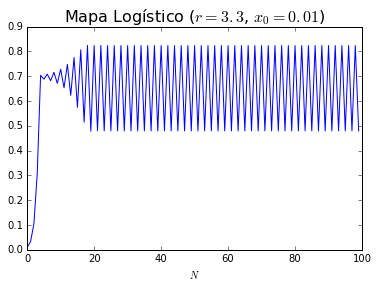

In [15]:
dim = 100
plt.plot(np.arange(dim), logisticmap(3.3, 0.01, dim))
plt.xlabel('$N$')
plt.title('Mapa Logístico ($r=3.3$, $x_{0}=0.01$)', fontsize = 16)
plt.show()

O diagrama de bifurcação sumariza o comportamento do mapa logistico em função de $r$.

Sabe-se que apenas resultados até $r = 4$ nos interessam.

Para gerar o diagrama utilizou-se o seguinte código:

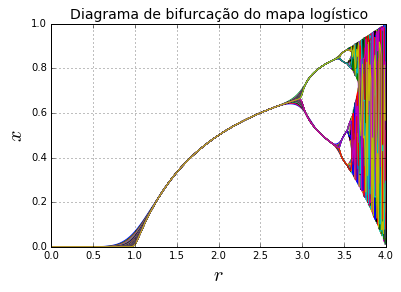

In [16]:
r = np.arange(0, 4, 0.01)
x = []
for i in r:
    x.append(logisticmap(i, 0.4, dim)[10:]) # desprezam-se os resultados de N < 10

plt.plot(r, x)
plt.xlabel('$r$', size = 20)
plt.ylabel('$x$', size = 20)
plt.title('Diagrama de bifurcação do mapa logístico', size = 14)
plt.grid(True)
plt.show()

Num sistema dinâmico, expoente de Lyapunov é uma caracteristica que nos permite obter informações sobre o seu comportamento, caracterizando o grau de separação entre trajectórias infinitesalmente próximas.
Para sistemas discretos, como o mapa logistico, o expoente de Lyapunov define-se como:
$$ \lambda = \lim_{n \to \infty} \frac{1}{n} \sum_{i=0}^{n-1}  ln\left| f'(x)  \right|$$

Para calcula-se o expoente de Lyapunov num conjunto de dados experimentais sem expressão definida, utiliza-se a expressão $f'(x) = r(1-2x)$

Ou seja, para calcular o expoente de Lyapunov teremos de implementar código que calcule a seguinte expressão:

$$ \lambda = \lim_{n \to \infty} \frac{1}{n} \sum_{i=0}^{n-1}  ln \left| r(1-2x_{i}) \right|$$

A implementação em Python para calcular o expoente de lyapunov em função de $r$ e $x_{0}$ é:

In [17]:
def lyapunov(func, r, x, n):
    s = 0
    lm = logisticmap(r, x, n)
    for i in range(0, n-1):
        s += np.log(abs((r * 1 - 2 * lm[i])))
    return(s/n)

/home/rafael/.local/lib/python3.4/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


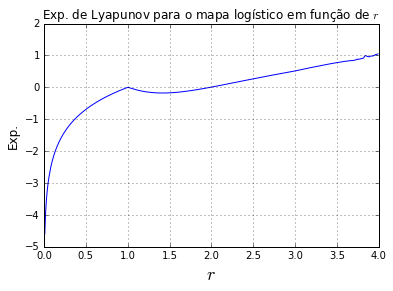

In [18]:
r = np.arange(0, 4, 0.01)
exp = []
for j in r:
    exp.append(lyapunov(logisticmap, j, 0.001, 800))

fig5 = plt.figure()
ax5 = plt.subplot(111)
plt.grid(True)
plt.xlabel('$r$', size = 18)
plt.ylabel('Exp.', size = 12)
plt.title('Exp. de Lyapunov para o mapa logístico em função de $r$')
plt.plot(r, exp)